### Aplicação de modelo de regressão linear em dados "Boston" do scikitlearn

In [3]:
# Importação das bibliotecas usuais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Importação de ferramentas do SciKit Learn -
# Dataset split, Modelo e Dataset Boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
print(".data:\n",boston.data[0]) # array de numpy
print(".features_names:\n",boston.feature_names)
print(".filename:\n",boston.filename)
print(".target:\n",boston.target[0:10])

.data:
 [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
.features_names:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.filename:
 /home/fernando/Python-Scripts/Jupyter/environment/lib/python3.8/site-packages/sklearn/datasets/data/boston_house_prices.csv
.target:
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [60]:
# transformação do dataset em dataframe do pandas
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['TG'] = boston.target

In [61]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TG
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Alguns plots

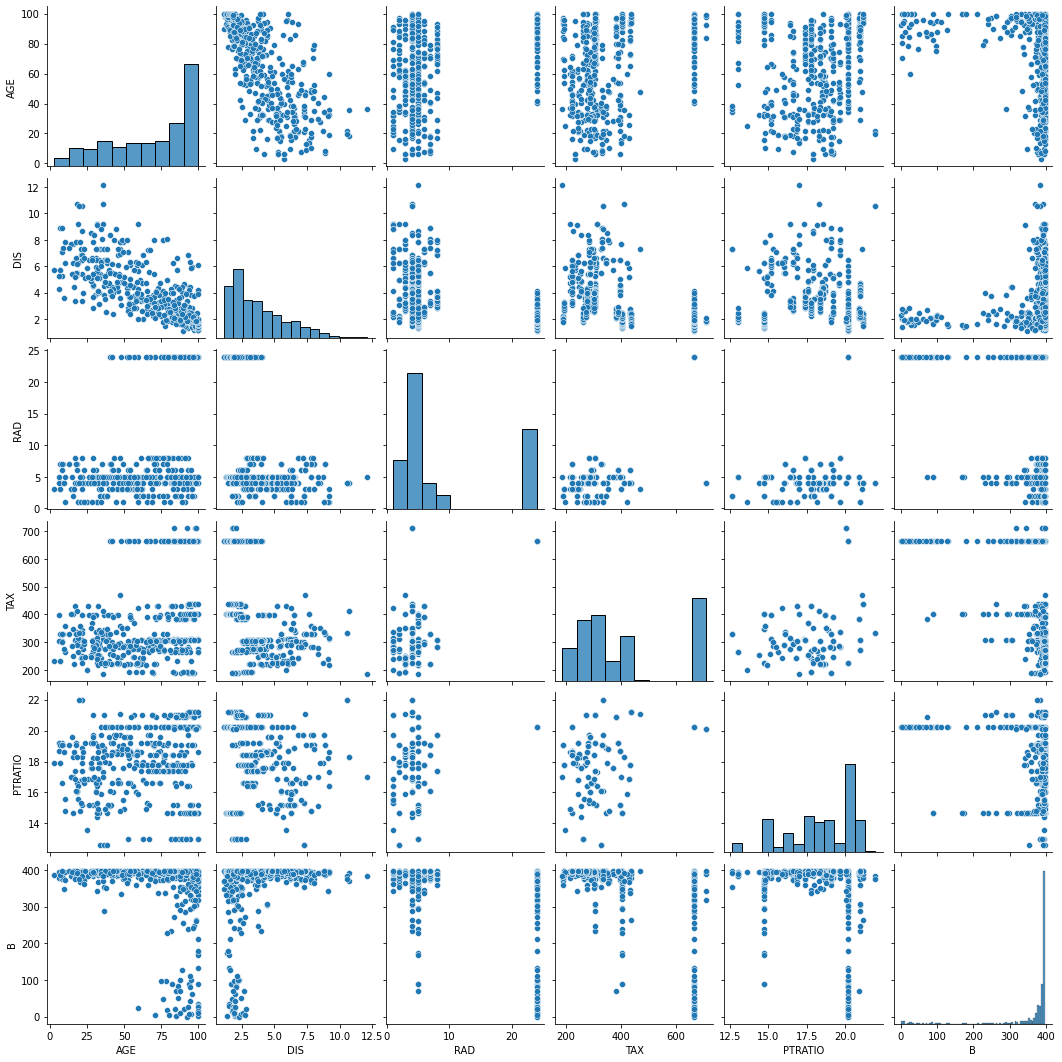

In [47]:
sns.pairplot(boston_df.loc[:,"AGE":"B"])

<AxesSubplot:>

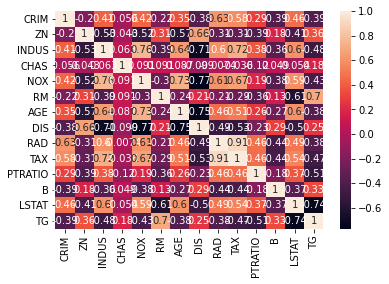

In [62]:
# Mapa de calor para as correlações entre as colunas do DF
sns.heatmap(boston_df.corr(),annot=True)

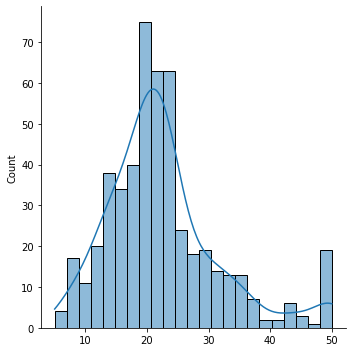

In [54]:
# Distribuição dos dados da coluna que se quer prever: boston.target
sns.displot(boston.target, kde=True)

### Separação dos dados em Test e Train

In [74]:
# A coluna target nesse caso está separada em um outro array
X = boston_df.loc[:, boston_df.columns != 'TG']
y = boston_df["TG"]

In [76]:
# Test size = 40% e random_state = 43
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)

### Modelo de Regressão Linear

In [77]:
# Inicialização do modelo
lm = LinearRegression()

In [78]:
# fit do modelo nos dados de treino
lm.fit(X_train, y_train)

LinearRegression()

### Avaliação do Modelo

In [80]:
# Intercept e Coefficient
print("INTERCEPT:",lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns = ["Coefficient"])
coeff_df

INTERCEPT: 38.17753052463408


,Coefficient
CRIM,-0.018428
ZN,0.038647
INDUS,0.047211
CHAS,2.630516
NOX,-18.584647
RM,3.543866
AGE,0.018526
DIS,-1.197913
RAD,0.328262
TAX,-0.014291


In [88]:
#print(boston.DESCR.find("Attribute"))
#print(boston.DESCR.find(":Missing"))
print(boston.DESCR[158:1238])

Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the pop

### Predições do modelo

In [91]:
predictions = lm.predict(X_test)

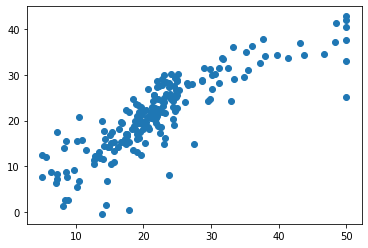

In [93]:
# plot das predições do modelo vs os valores reais
plt.scatter(y_test, predictions)

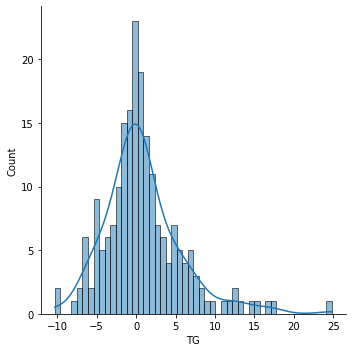

In [97]:
sns.displot((y_test-predictions), bins=50, kde = True)

### Métricas de avaliação do modelo

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [98]:
from sklearn import metrics

In [100]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

MAE: 3.45
MSE: 25.14
RMSE: 5.01
